# 第1章 とにかくDeep Learningを体験！

## Google Colaboratory上で，TensorFlowによる文字認識（MNISTデータ）をやってみよう．

## MNISTデータセット

MNIST，手書き数字画像のデータセットである．  
米国商務省配下の研究所が構築したこのデータベースは，機械学習分野での学習や評価に広く用いられている．  
<img src="img/MnistExamples.png">
<div style="text-align: center;">
図1.  MNISTテストデータセットのサンプル
</div>

参考文献:
[MNISTデータベース](https://ja.wikipedia.org/wiki/MNIST%E3%83%87%E3%83%BC%E3%82%BF%E3%83%99%E3%83%BC%E3%82%B9)

## さっそく動かしてみよう！

In [1]:
# TensorFlow をセットアップする
import tensorflow as tf

# MNIST（0から9の数字画像）セットを読み込む
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 機械学習モデルを構築する
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# モデルの構成
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# 学習
model.fit(x_train, y_train, epochs=5)

# モデルの評価を行う
model.evaluate(x_test,  y_test, verbose=2)

# テストデータに対する予測を行う
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

Metal device set to: Apple M1 Max


2023-02-26 10:01:29.965184: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-26 10:01:29.965685: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-26 10:01:30.176038: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5
   1/1875 [..............................] - ETA: 9:59 - loss: 2.4758 - accuracy: 0.0312

2023-02-26 10:01:30.363661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.2867 - accuracy: 0.9172
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1336 - accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0988 - accuracy: 0.9701
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0795 - accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0679 - accuracy: 0.9785


2023-02-26 10:02:18.389827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.0742 - accuracy: 0.9774 - 1s/epoch - 4ms/step


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.4694967e-08, 3.3039380e-09, 1.6087948e-06, 3.5667367e-04,
        2.1190740e-11, 4.7443132e-07, 1.6143265e-13, 9.9960095e-01,
        5.2066393e-06, 3.4999892e-05],
       [3.6567146e-06, 5.0954765e-04, 9.9947232e-01, 1.3757899e-05,
        2.3838796e-11, 2.0970278e-07, 2.8991332e-07, 9.5672515e-12,
        3.2444825e-07, 1.0448526e-12],
       [2.1636801e-07, 9.9776131e-01, 5.9609069e-04, 8.0029451e-05,
        1.4707148e-04, 4.2889766e-05, 5.7989786e-05, 1.0026129e-03,
        3.0216921e-04, 9.5870146e-06],
       [9.9997616e-01, 8.6125707e-10, 1.2127677e-05, 3.6793679e-09,
        8.2665940e-07, 2.0464769e-07, 8.9652103e-06, 1.8800696e-08,
        2.0677667e-10, 1.6271520e-06],
       [1.6972085e-06, 5.6672350e-10, 1.7289651e-06, 1.4510196e-09,
        9.9560654e-01, 6.7167534e-08, 5.3954921e-07, 4.2582757e-05,
        2.1121551e-07, 4.3466697e-03]], dtype=float32)>

## 文字認識の結果を確認してみよう

予測：7 正解：7


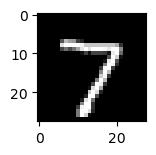

予測：2 正解：2


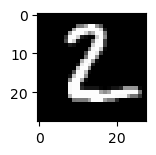

予測：1 正解：1


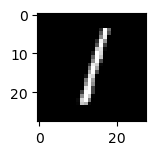

予測：0 正解：0


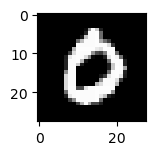

予測：4 正解：4


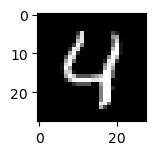

In [2]:
import numpy as np
import matplotlib.pyplot as plt

predictions = probability_model(x_test[:5])

# 予測と正解を可視化して比べてみる
for index, prediction in enumerate(predictions):
    print(f'予測：{np.argmax(prediction)} 正解：{y_test[index]}')
    ax = plt.subplot(3, 3, index + 1)
    plt.imshow(x_test[index] * 255, cmap="gray")
    plt.show()

### 参考文献
- [初心者のための TensorFlow 2.0 入門](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja)
- [TensorFlowのチュートリアルをコメント付けながら実行してみた（初心者のための_TensorFlow_2_0_入門）](https://qiita.com/penpenta/items/ee45f58d416c656639aa)

[講義資料に戻る](https://github.com/crotsu/Deep_Learning_Starting_with_Examples)

このページは[このリンク](https://colab.research.google.com/github/crotsu/Deep_Learning_Starting_with_Examples/blob/main/chap1_deeplearning/chap1_document.ipynb)よりgoogle colaboratoryで動作させることができる．  